In [4]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
## Load IRIS dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
## Instantiate the KMeans models
km = KMeans(n_clusters=3, random_state=42)
# Fit the KMeans model
km.fit_predict(X)
# Calculate Silhoutte Score
score = silhouette_score(X, km.labels_, metric='euclidean')
# Print the score
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.553


In [5]:
# !pip install yellowbrick

0.6810461692117462 0


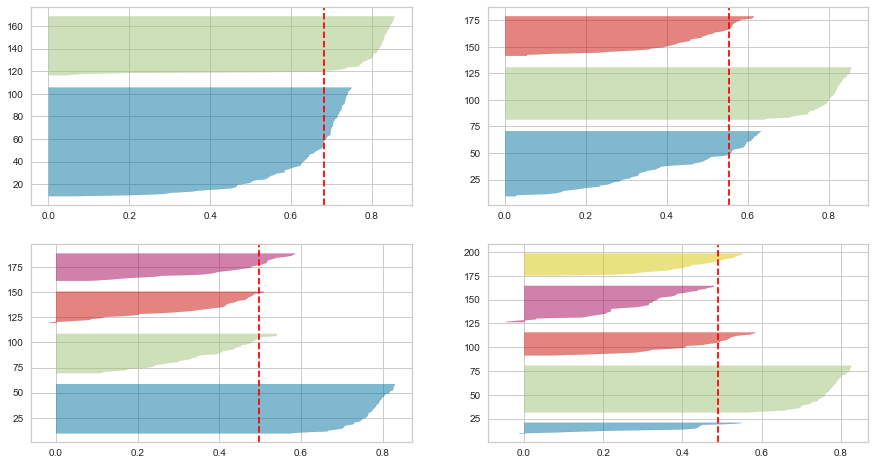

In [10]:
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize=(15,8))
scores = []
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    # Fit the KMeans model
    km.fit_predict(X)
    # Calculate Silhoutte Score
    score = silhouette_score(X, km.labels_, metric='euclidean')
    scores.append(score)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

print(max(scores), scores.index(max(scores)))